In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
file_path = r"C:\Users\DELL\Desktop\Internship_task\CodSoft\MOVIE_RATING\IMDb_Movies_India.csv"
df = pd.read_csv(file_path, encoding='iso-8859-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
df['Rating'].mean()

5.841621416845562

In [5]:
df[['Rating','Votes']].head(50)

,Rating,Votes
0,NaN,NaN
1,7.0,8
2,NaN,NaN
3,4.4,35
4,NaN,NaN
5,4.7,827
6,7.4,"1,086"
7,NaN,NaN
8,5.6,326
9,4.0,11


In [6]:
df['Votes'].isna().sum()

7589

In [7]:
df.dropna(subset=['Rating','Votes'],inplace=True)


In [8]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3'],inplace=True)

In [9]:
df.dropna(subset=['Genre'],inplace=True)

In [10]:
df['Duration'].mode()

0    120 min
Name: Duration, dtype: object

In [11]:
import seaborn as sns

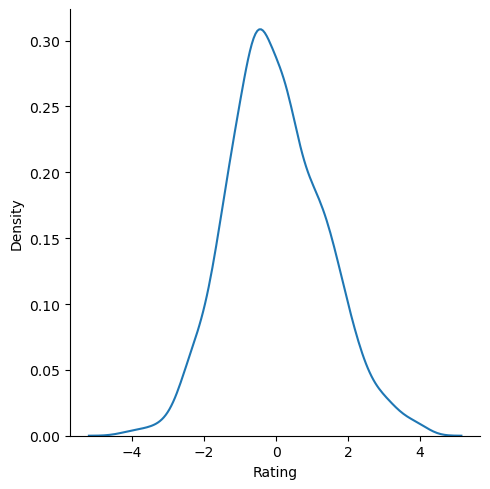

In [24]:
sns.displot(Y_pred-Y_test,kind='kde')

In [25]:
df.drop(['Duration'],axis=1,inplace=True)

In [26]:
df.isnull().sum()

Name        0
Year        0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [27]:
df.columns

Index(['Name', 'Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

In [29]:
X=df[['Year','Genre','Director','Actor 1','Actor 2','Actor 3']]

In [30]:
Y=df['Rating']

In [32]:
# Remove commas and convert 'Votes' column to float
df['Votes'] = df['Votes'].replace(',', '').astype(float)


In [33]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Separate your features (X) and target (Y)
X = numeric_columns.drop('Rating', axis=1)  # Exclude the 'Rating' column
Y = df['Rating']


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [35]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [37]:
# Make predictions on the test set
Y_pred = model.predict(X_test)


In [38]:

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.7296598347438095
R-squared: 0.06648049907327003
